In [31]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm

In [32]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/T2T_cluster.json') 
T2T_dict = json.load(f) 

In [33]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[5].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[6].strip())

In [36]:
T2T_startStopDict

{'0': ['28660073', '28686560'],
 '1': ['29200666', '29239364'],
 '2': ['29320751', '29356076'],
 '3': ['30970141', '31197826'],
 '4': ['31849744', '32018110'],
 '5': ['32840470', '33089756'],
 '6': ['33304751', '33544621'],
 '7': ['34544016', '35727720'],
 '8': ['36090299', '36170539'],
 '9': ['36446096', '36601337'],
 '10': ['36962296', '37064473'],
 '11': ['37332529', '37586845'],
 '12': ['38042676', '38272786'],
 '13': ['38635464', '38727799'],
 '14': ['39006879', '39169384'],
 '15': ['39473476', '39590171'],
 '16': ['39897297', '40183034'],
 '17': ['40686702', '41531223'],
 '18': ['42579144', '43446244'],
 '19': ['43798098', '43921861'],
 '20': ['44190151', '44347801'],
 '21': ['44648351', '44762618'],
 '22': ['45144310', '45495331'],
 '23': ['45988930', '46763256'],
 '24': ['47729648', '48109787'],
 '25': ['48408367', '48709963'],
 '26': ['49228330', '49887072'],
 '27': ['50225315', '50896753'],
 '28': ['51291660', '51546390'],
 '29': ['52073102', '52251131'],
 '30': ['52851656', 

In [34]:
samtools='chrY'
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/finalized/T2T.ChrY.Final.fasta.out') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        
        myLines.append(goodLine)

100%|█████████████████████████████████| 29612/29612 [00:00<00:00, 369808.70it/s]


In [35]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [37]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(27617807)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 46/46 [00:00<00:00, 269843.33it/s]


In [38]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'])

In [39]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HG002'

In [40]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1042266,27617807,28660072,HG002
1,0,Repeat Block,26488,28660073,28686560,HG002
2,1,Spacer Block,514105,28686561,29200665,HG002
3,1,Repeat Block,38699,29200666,29239364,HG002
4,2,Spacer Block,81386,29239365,29320750,HG002
...,...,...,...,...,...,...
81,40,Repeat Block,61620,61389881,61451500,HG002
82,41,Spacer Block,239710,61451501,61691210,HG002
83,41,Repeat Block,23386,61691211,61714596,HG002
84,42,Spacer Block,287520,61714597,62002116,HG002


In [41]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/T2T/BlockSize_dataframe.csv")

In [42]:
#Make a file with the coordinates for DYZ1 blocks
with open("/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/T2T_spacerBlock_DYZ1_regions.tsv", 'a+') as file:
    for key in NRB_Blocks.keys():
        file.write(str(key)+"\t"+str(samtools)+"\t"+str(NRB_Blocks[key].split("-")[0])+"\t"+str(NRB_Blocks[key].split("-")[1])+"\n")
    file.close()

In [43]:
#Make a file with the coordinates for DYZ1 blocks
with open("/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/T2T/T2T_spacerBlock_DYZ1_regions_samtools.tsv", 'a+') as file:
    for key in NRB_Blocks.keys():
        file.write(samtools+":"+str(NRB_Blocks[key])+"\n")
    file.close()

## Import HaeIII results

In [20]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(NRB_Blocks[key][0].split(" ")[4])+":"+str(NRB_Blocks[key][0].split(" ")[5])+"-"+str(NRB_Blocks[key][-1].split(" ")[6])]=key

In [22]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/DYZ1_Blocks/Restriction_Digest/headers/T2T_headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary[line.split(" ")[7].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
    f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():

    for item in SpacerBlocks[key]:
        SpacerBlockList.append([key, int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])
tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 5717/5717 [00:00<00:00, 148338.91it/s]


In [23]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           247             0      99  27617734  27617832
            217             0    2018  27617833  27619850
            242             0    1109  27619851  27620959
            214             0    2027  27620960  27622986
            209             0    2699  27622987  27625685
...                       ...     ...       ...       ...
45          5715           45     420  62088880  62089299
            5713           45     776  62089300  62090075
            5716           45      81  62090076  62090156
            5710           45    1975  62090157  62092131
            5711           45    1565  62092132  62093696

[5717 rows x 4 columns]

In [26]:
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 43:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==key])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])

<AxesSubplot:xlabel='SpacerBlock', ylabel='Total Fragments'>

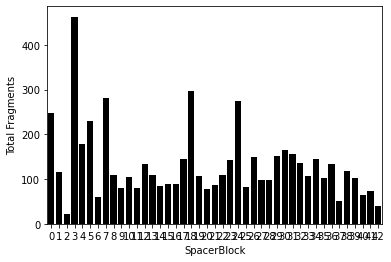

In [27]:
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')

In [28]:
print("Mean: "+str(np.mean(desired_df['Length'])))
print("Median: "+str(np.median(desired_df['Length'])))

Mean: 3544.3947874759488
Median: 3554.0


In [29]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<43]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<43]['Length'])))

Mean: 3556.1468986118434
Median: 3554.0


(array([1.950e+02, 3.480e+02, 4.976e+03, 1.800e+01, 6.300e+01, 8.800e+01,
        2.000e+00, 9.000e+00, 1.000e+00, 1.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

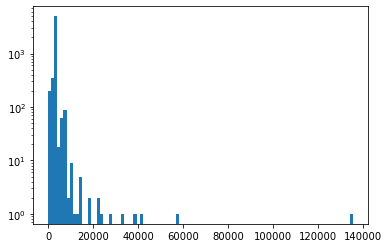

In [30]:
plt.hist(desired_df['Length'], log=True, bins=100)

# Split 

In [84]:
NRB_Blocks[0]

['144 25.2 0.0 0.0 chrY 27617733 27618074 (34841955) + (GTGGA)n Simple_repeat 1 342 (0) 34658',
 '45 7.2 0.0 0.0 chrY 27618084 27618142 (34841887) + (TGGAA)n Simple_repeat 1 59 (0) 34659',
 '401 20.0 7.5 3.4 chrY 27618156 27618343 (34841686) C HSATII Satellite (7) 195 1 34660',
 '27 27.6 0.0 0.0 chrY 27618346 27618421 (34841608) + (GGAAT)n Simple_repeat 1 76 (0) 34661',
 '515 17.4 11.3 3.1 chrY 27618422 27618700 (34841329) C HSATII Satellite (7) 301 1 34662',
 '21 27.0 0.0 0.0 chrY 27618701 27618759 (34841270) + (AATGG)n Simple_repeat 1 59 (0) 34663',
 '464 16.2 7.8 7.4 chrY 27618771 27618981 (34841048) C HSATII Satellite (8) 211 1 34664',
 '95 23.8 0.5 0.5 chrY 27618985 27619207 (34840822) + (ATGGA)n Simple_repeat 1 223 (0) 34665',
 '473 19.9 6.1 6.5 chrY 27619215 27619496 (34840533) C HSATII Satellite (4) 280 1 34666',
 '73 21.0 0.0 0.0 chrY 27619501 27619653 (34840376) + (GAGTG)n Simple_repeat 1 153 (0) 34667',
 '315 20.2 7.8 7.1 chrY 27619654 27619894 (34840135) C HSATII Satellite 

In [86]:
NRB_SplitBlocks = {x:[] for x in NRB_Blocks.keys()}
NRB_SplitBlock_Counts = {x:[] for x in NRB_Blocks.keys()}

for key in NRB_Blocks.keys():
    
    tempList = []
    tempCount = 0

    switch = 'temp'
    for repeat in NRB_Blocks[key]:
        if switch == 'temp':
            tempList.append(repeat)
            tempCount+= int(int(repeat.split(" ")[6].strip()) - int(repeat.split(" ")[5].strip()))+1
            switch = str(repeat.split(" ")[10].strip())
        else:
            if str(repeat.split(" ")[10].strip()) == switch:
                tempList.append(repeat)
                tempCount+= int(int(repeat.split(" ")[6].strip()) - int(repeat.split(" ")[5].strip()))+1
            else:
                tempList.append(repeat)
                tempCount+= int(int(repeat.split(" ")[6].strip()) - int(repeat.split(" ")[5].strip()))+1
                NRB_SplitBlocks[key].append(tempList)
                NRB_SplitBlock_Counts[key].append(tempCount)
                tempCount = 0
                tempList=[]
        
    

In [156]:
NRB_SplitBlocks[2]

[['5854 20.0 1.6 1.8 chrY 29239365 29287932 (33172097) + (AATGG)n Simple_repeat 1 48456 (0) 36330',
  '4208 20.0 1.5 1.8 chrY 29286071 29320749 (33139280) + (GAATG)n Satellite 1 34592 (0) 36331 *']]

In [153]:
#These are the min and max sizes of a spacer sub block
for key in NRB_SplitBlock_Counts.keys():
    print("BLOCK: "+str(key))
    print("Total Subblocks: "+str(len(NRB_SplitBlock_Counts[key])))
    print(min(collections.Counter(NRB_SplitBlock_Counts[key]).keys()))
    print(max(collections.Counter(NRB_SplitBlock_Counts[key]).keys()))
    print("\n")

BLOCK: 0
Total Subblocks: 719
34
323777


BLOCK: 1
Total Subblocks: 164
63
205911


BLOCK: 2
Total Subblocks: 1
83247
83247


BLOCK: 3
Total Subblocks: 527
61
238780


BLOCK: 4
Total Subblocks: 336
108
120982


BLOCK: 5
Total Subblocks: 185
32
235630


BLOCK: 6
Total Subblocks: 48
129
82561


BLOCK: 7
Total Subblocks: 125
151
511541


BLOCK: 8
Total Subblocks: 53
166
234039


BLOCK: 9
Total Subblocks: 100
110
78381


BLOCK: 10
Total Subblocks: 89
21
81224


BLOCK: 11
Total Subblocks: 44
129
113764


BLOCK: 12
Total Subblocks: 116
110
119959


BLOCK: 13
Total Subblocks: 98
143
179717


BLOCK: 14
Total Subblocks: 102
110
60590


BLOCK: 15
Total Subblocks: 58
32
121799


BLOCK: 16
Total Subblocks: 49
21
180440


BLOCK: 17
Total Subblocks: 102
41
183703


BLOCK: 18
Total Subblocks: 231
32
239253


BLOCK: 19
Total Subblocks: 92
129
167785


BLOCK: 20
Total Subblocks: 91
21
60141


BLOCK: 21
Total Subblocks: 48
143
171863


BLOCK: 22
Total Subblocks: 61
95
236712


BLOCK: 23
Total Subblocks:

In [154]:
NRB_SplitBlock_Counts

{0: [589,
  355,
  270,
  505,
  394,
  302,
  610,
  598,
  327,
  270,
  520,
  627,
  610,
  611,
  328,
  372,
  627,
  610,
  611,
  327,
  255,
  511,
  645,
  610,
  598,
  367,
  237,
  522,
  627,
  610,
  598,
  317,
  255,
  254,
  645,
  464,
  598,
  327,
  267,
  522,
  405,
  303,
  610,
  598,
  317,
  270,
  545,
  612,
  464,
  598,
  357,
  237,
  522,
  627,
  610,
  598,
  317,
  255,
  511,
  645,
  610,
  598,
  357,
  237,
  522,
  627,
  610,
  598,
  317,
  255,
  511,
  645,
  464,
  598,
  327,
  267,
  522,
  405,
  303,
  610,
  598,
  317,
  270,
  545,
  612,
  459,
  601,
  322,
  267,
  546,
  167,
  212,
  303,
  543,
  666,
  317,
  335,
  436,
  213,
  156,
  353,
  632,
  611,
  334,
  237,
  556,
  364,
  306,
  531,
  256,
  311,
  357,
  454,
  378,
  472,
  71,
  162,
  635,
  334,
  240,
  522,
  622,
  284,
  71,
  167,
  612,
  295,
  270,
  579,
  343,
  320,
  402,
  315,
  492,
  302,
  357,
  467,
  390,
  303,
  682,
  256,
  322,
  357

In [148]:
sizes = []
for x in NRB_SplitBlock_Counts.keys():
    for y in NRB_SplitBlock_Counts[x]:
        sizes.append(int(y))
print(np.mean(sizes))
print(np.median(sizes))

3164.4652960526314
1555.0


In [155]:
NRB_SplitBlock_Counts[2]

[83247]

In [152]:
sizes = []
for x in NRB_SplitBlock_Counts.keys():
    for y in NRB_SplitBlock_Counts[x]:
        if y < 5000:
            sizes.append(int(y))
print(np.mean(sizes))
print(np.median(sizes))

1189.4807757166948
1551.0


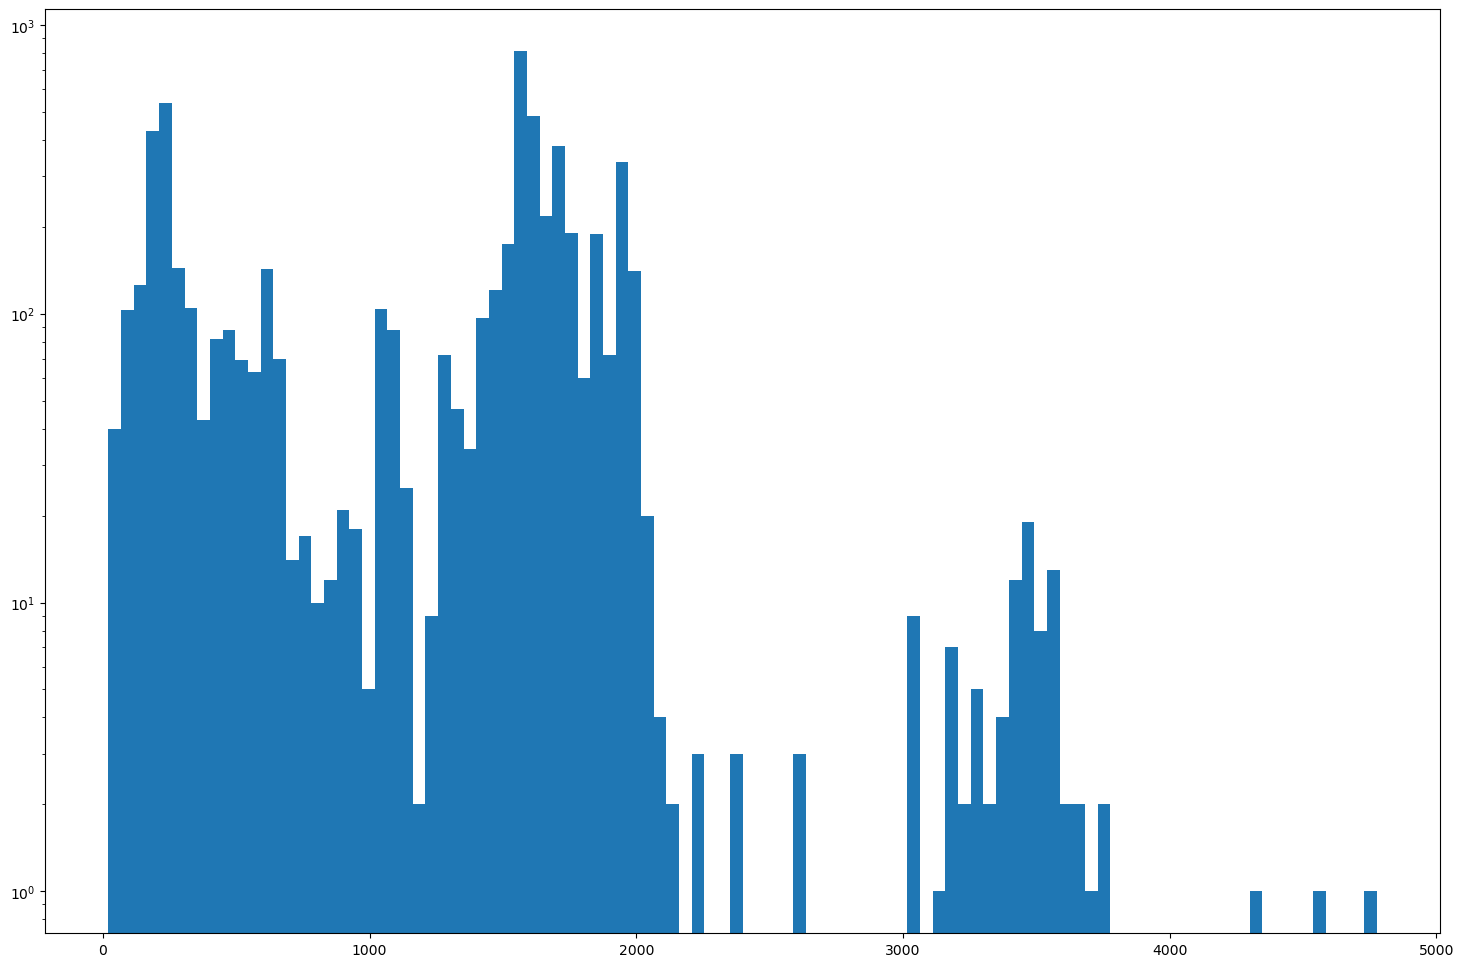

In [151]:
plt.hist(sizes, log=True, bins=100)
plt.show()

In [126]:
NRB_SplitBlocks[1][163]

['6173 20.3 1.6 1.9 chrY 28996565 29113423 (33346606) + (CATTCCATTC)n Simple_repeat 1 116590 (0) 36275 *',
 '6339 20.2 1.6 1.9 chrY 29111985 29171975 (33288054) + (TTCCATTCCA)n Simple_repeat 1 59834 (0) 36276',
 '3500 20.0 1.6 1.8 chrY 29170708 29199695 (33260334) + (CATTCCATTC)n Simple_repeat 1 28925 (0) 36277 *',
 '408 22.6 3.6 8.9 chrY 29199696 29199768 (33260261) + HSATII Satellite 104 165 (5) 36278']

In [20]:
#################################################################################################################3

In [143]:
i =0
for size in NRB_SplitBlock_Counts[0]:
    if size > 30000:
        print(str(i)+" Large "+str(size))
        i+=1
    elif size < 50:
        print(str(i)+" Small "+str(size))
        i+=1
    
    else:
        i+=1

284 Small 47
332 Small 47
339 Small 47
411 Small 34
427 Small 34
440 Small 44
446 Small 34
478 Large 323777
557 Large 60805
619 Small 43
644 Large 119776


In [103]:
NRB_SplitBlocks[0][284]

['16 18.9 0.0 0.0 chrY 27736379 27736414 (34723615) + (AGTGG)n Simple_repeat 1 36 (0) 35237',
 '456 18.7 6.7 5.1 chrY 27736428 27736438 (34723591) C HSATII Satellite (33) 137 127 35238']

In [94]:
NRB_SplitBlocks[0][478]

['2841 20.4 1.6 1.6 chrY 27811283 27838000 (34622029) + (AATGG)n Simple_repeat 1 26722 (0) 35582 *',
 '6300 20.4 1.6 1.8 chrY 27836374 27954062 (34505967) + (GGAAT)n Simple_repeat 1 117536 (0) 35583 *',
 '6599 20.1 1.6 1.9 chrY 27952227 28070016 (34390013) + (GGAATGGAAT)n Simple_repeat 1 117401 (0) 35584',
 '6407 20.2 1.6 1.9 chrY 28068275 28127914 (34332115) + (AATGG)n Simple_repeat 1 59491 (0) 35585 *',
 '58 25.1 0.0 0.7 chrY 28127945 28128092 (34331937) + (ATGGA)n Simple_repeat 1 147 (0) 35586',
 '387 19.1 4.5 8.9 chrY 28128096 28129887 (34330142) C HSATII Satellite (4) 1711 1 35587']

In [98]:
NRB_SplitBlocks[0][557]

['6357 20.2 1.7 1.8 chrY 28242175 28302096 (34157933) + (GGAATGGAAT)n Simple_repeat 1 59850 (0) 35737',
 '410 18.1 2.6 11.9 chrY 28302090 28302972 (34157057) C HSATII Satellite (4) 800 1 35738']

In [105]:
NRB_SplitBlocks[0][644]

['6332 20.3 1.5 1.9 chrY 28416332 28475995 (33984034) + (AATGGAATGG)n Simple_repeat 1 59476 (0) 35879',
 '6151 20.3 1.6 1.9 chrY 28474117 28534059 (33925970) + (AATGG)n Simple_repeat 1 59718 (0) 35880 *',
 '248 23.3 4.1 6.0 chrY 28534128 28534296 (33925733) C HSATII Satellite (4) 166 1 35881']

In [123]:
NRB_SplitBlock_Counts

{0: [589,
  355,
  270,
  505,
  394,
  302,
  610,
  598,
  327,
  270,
  520,
  627,
  610,
  611,
  328,
  372,
  627,
  610,
  611,
  327,
  255,
  511,
  645,
  610,
  598,
  367,
  237,
  522,
  627,
  610,
  598,
  317,
  255,
  254,
  645,
  464,
  598,
  327,
  267,
  522,
  405,
  303,
  610,
  598,
  317,
  270,
  545,
  612,
  464,
  598,
  357,
  237,
  522,
  627,
  610,
  598,
  317,
  255,
  511,
  645,
  610,
  598,
  357,
  237,
  522,
  627,
  610,
  598,
  317,
  255,
  511,
  645,
  464,
  598,
  327,
  267,
  522,
  405,
  303,
  610,
  598,
  317,
  270,
  545,
  612,
  459,
  601,
  322,
  267,
  546,
  167,
  212,
  303,
  543,
  666,
  317,
  335,
  436,
  213,
  156,
  353,
  632,
  611,
  334,
  237,
  556,
  364,
  306,
  531,
  256,
  311,
  357,
  454,
  378,
  472,
  71,
  162,
  635,
  334,
  240,
  522,
  622,
  284,
  71,
  167,
  612,
  295,
  270,
  579,
  343,
  320,
  402,
  315,
  492,
  302,
  357,
  467,
  390,
  303,
  682,
  256,
  322,
  357

In [106]:
NRBSBC_list = []
for key in NRB_SplitBlock_Counts:
    for count in NRB_SplitBlock_Counts[key]:
        if count < 50000:
            NRBSBC_list.append([key,count, 'black'])
        elif count >= 50000 and count < 80000:
            NRBSBC_list.append([key,count, 'green'])
        elif count >= 80000 and count < 200000:
            NRBSBC_list.append([key,count, 'blue'])
        else:
            NRBSBC_list.append([key,count, 'red'])

        
NRBSBC_DF = pd.DataFrame(data=NRBSBC_list, columns=['SpacerBlock','SpaceSub_Size','Size_Group'])

In [107]:
import ast
pullTheseSequences=[]
for key in NRB_SplitBlocks.keys():
    for subblock in NRB_SplitBlocks[key]:
        tempLength=0
        for repeat in subblock:
            tempLength += (int(repeat.split(" ")[6].strip())-int(repeat.split(" ")[5].strip()))+1
            
        if tempLength == 1585:
            pullTheseSequences.append("SpacerBlock_"+str(key)+"_"+str(subblock[0].split(" ")[5])+"_"+str(subblock[-1].split(" ")[6]))
        else:
            continue

with open("/home/mark/Desktop/chromosome_y/nonRepeatBlockSubBlocks/DYZ1_Sequences.txt", "a+") as file:
    for entry in pullTheseSequences:
        file.write(entry+"\n")
    file.close()

In [108]:
import collections
print(collections.Counter(NRBSBC_DF['SpaceSub_Size']))

Counter({1585: 272, 166: 143, 216: 96, 201: 73, 1602: 66, 1617: 61, 1590: 59, 240: 57, 1453: 54, 1576: 53, 1710: 47, 230: 47, 204: 44, 1559: 42, 151: 42, 1730: 41, 110: 40, 245: 39, 1071: 37, 1551: 37, 1735: 36, 1950: 35, 1955: 35, 1570: 31, 1957: 29, 226: 29, 639: 28, 213: 27, 174: 26, 276: 24, 1620: 23, 90: 23, 1615: 22, 181: 22, 1542: 21, 1591: 21, 1720: 20, 1954: 20, 1940: 19, 1725: 19, 1740: 19, 1610: 19, 483: 19, 1675: 19, 1715: 19, 1567: 19, 1584: 19, 1600: 19, 256: 18, 187: 18, 440: 18, 1554: 18, 1552: 18, 248: 17, 1031: 17, 1527: 17, 1705: 17, 236: 17, 1301: 17, 1607: 17, 218: 17, 251: 16, 1557: 16, 1560: 16, 1575: 16, 224: 16, 1703: 16, 1734: 16, 239: 16, 1539: 15, 132: 15, 544: 15, 1629: 15, 1544: 15, 1599: 15, 1117: 15, 1045: 15, 1310: 15, 1410: 14, 1860: 14, 1630: 14, 1685: 14, 1655: 14, 115: 14, 1943: 14, 129: 14, 1975: 14, 159: 14, 1517: 14, 1625: 13, 186: 13, 1592: 13, 1581: 13, 1434: 13, 1660: 13, 1640: 13, 1865: 13, 1060: 13, 1712: 13, 212: 12, 1533: 12, 1677: 12, 172

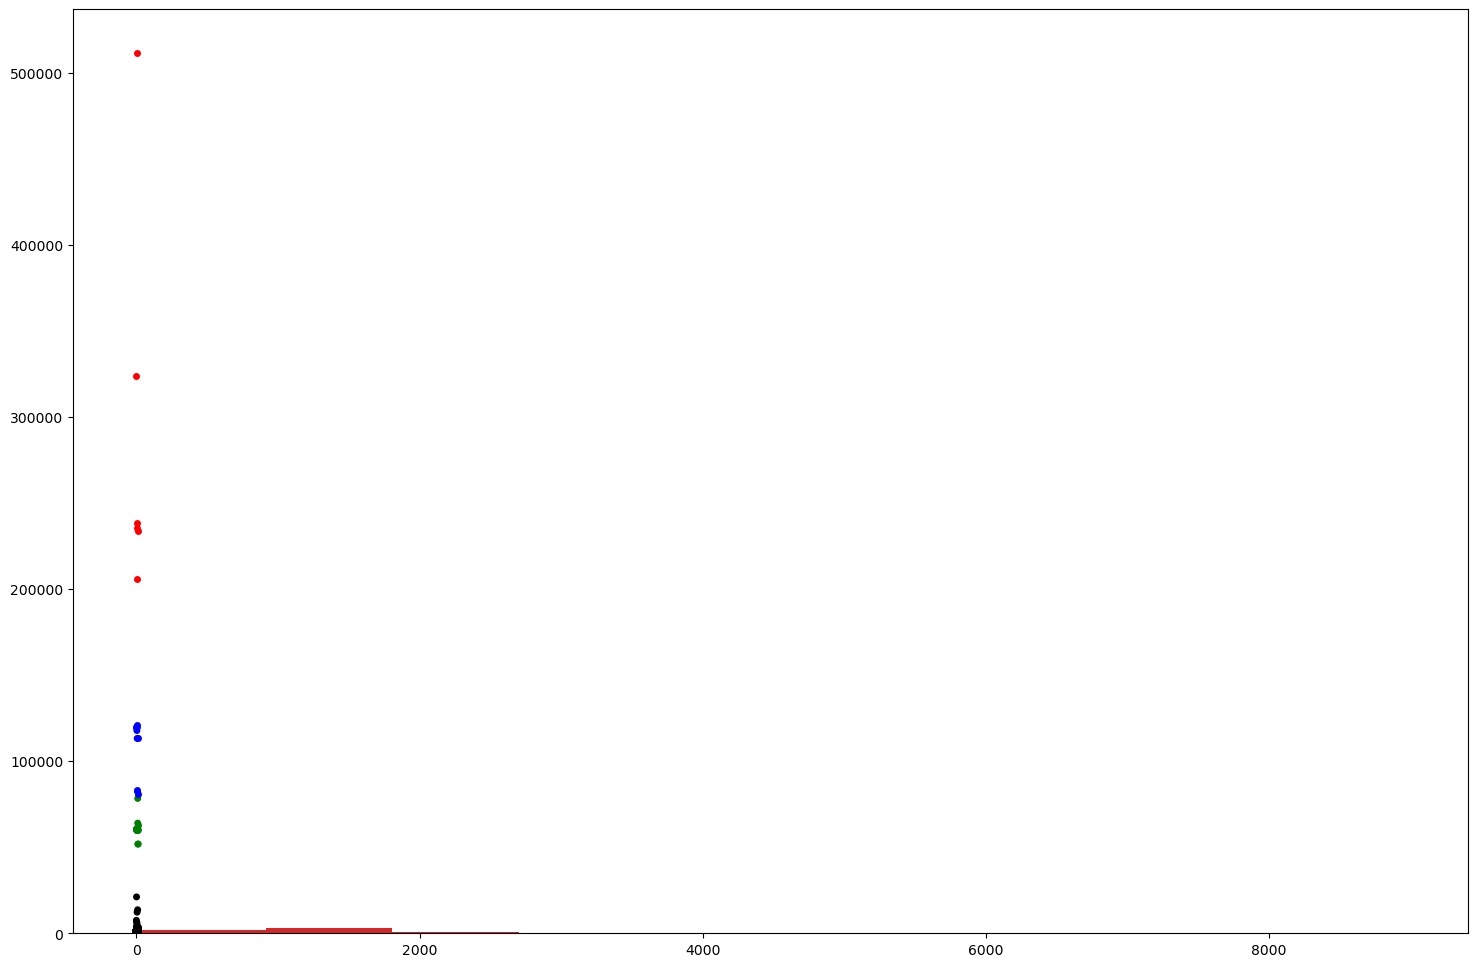

In [122]:
plt.hist([int(x) for x in NRBSBC_DF[NRBSBC_DF['SpaceSub_Size']< 10000]['SpaceSub_Size']])
plt.show()

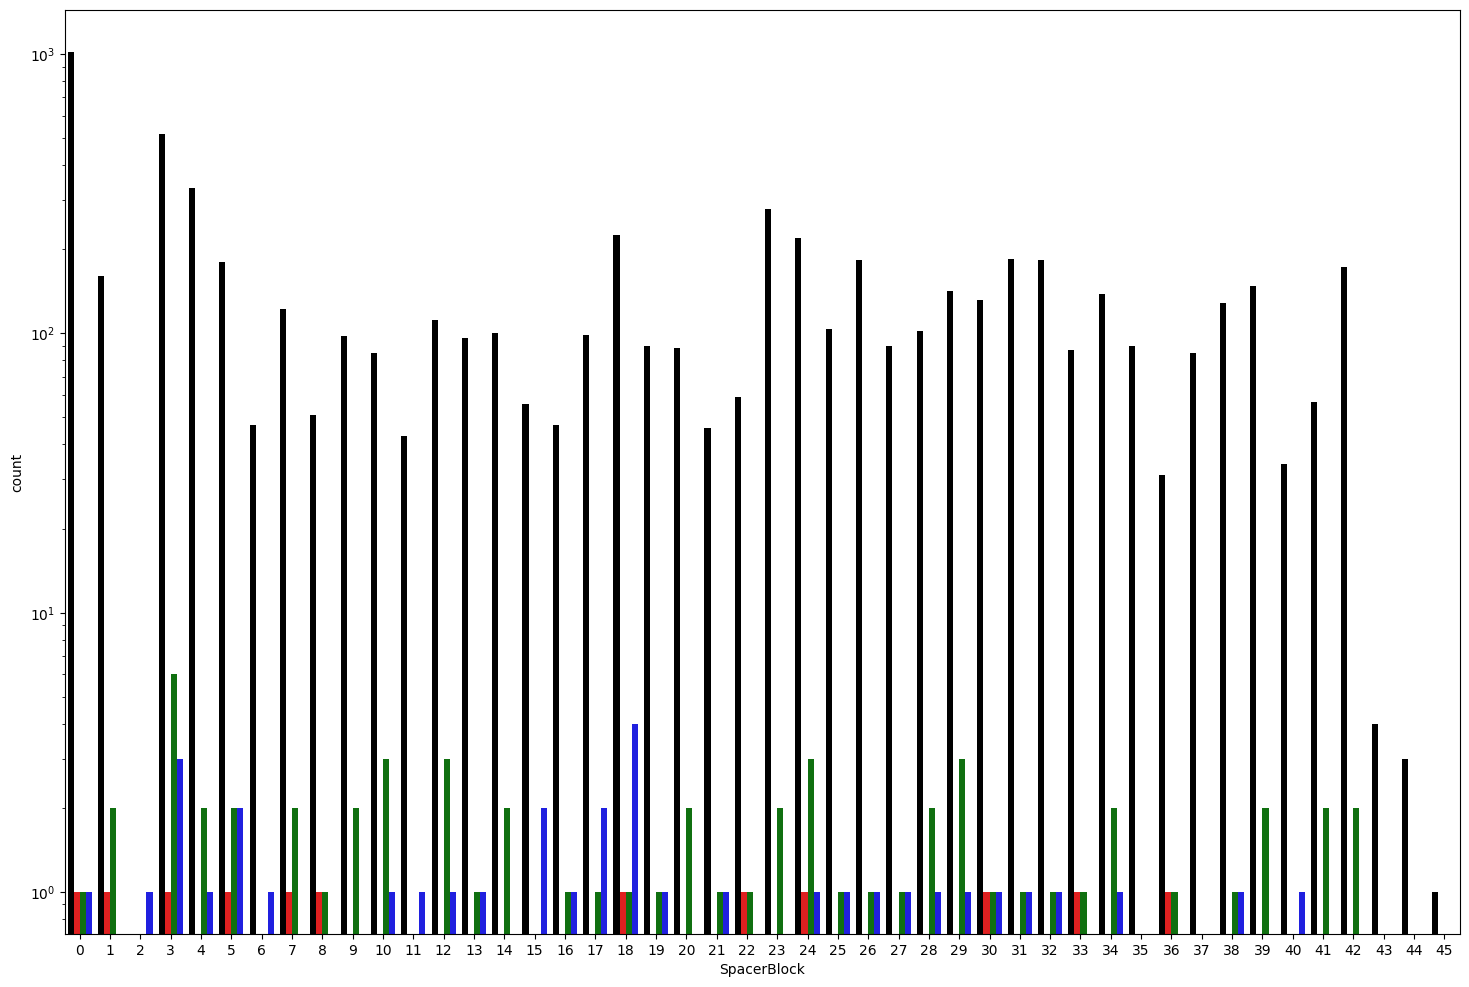

In [22]:
ax= sns.countplot(x="SpacerBlock", hue="Size_Group", data=NRBSBC_DF, palette=palette, log=True)
ax.get_legend().remove()
plt.show()

In [23]:
tempDF = pd.DataFrame(index=set(NRBSBC_DF['SpacerBlock']), columns=list(palette.keys())).fillna(0)
for row in tempDF.index:
    for color in list(NRBSBC_DF[NRBSBC_DF['SpacerBlock']==row]['Size_Group']):
        tempDF.at[row,color]+=1
        
tempDF.head()

,black,red,blue,green
0,1021,1,1,1
1,161,1,0,2
2,0,0,1,0
3,517,1,3,6
4,333,0,1,2


In [24]:
from scipy.spatial import distance
heatDF_mInfo3 = pd.DataFrame(index=tempDF.sort_index().index, columns=tempDF.sort_index().index).fillna(0.0)
for index in heatDF_mInfo3.index:
    for column in heatDF_mInfo3.columns:
        heatDF_mInfo3.at[index,column]= 1-float(distance.braycurtis(list(tempDF.loc[index]), list(tempDF.loc[column])))
heatDF_mInfo3.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1.000000,0.274411,0.001951,0.670535,0.492647,0.302730,0.089552,0.215840,0.098422,0.176157,...,0.062441,0.153291,0.225303,0.253833,0.066100,0.107110,0.290242,0.007782,0.005842,0.001951
1,0.274411,1.000000,0.000000,0.474674,0.652000,0.939828,0.443396,0.865052,0.488479,0.757576,...,0.335025,0.682731,0.877551,0.955414,0.341709,0.529148,0.961652,0.047619,0.035928,0.012121
2,0.001951,0.000000,1.000000,0.003788,0.005935,0.010753,0.040816,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.015267,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.670535,0.474674,0.003788,1.000000,0.778679,0.519663,0.166957,0.383436,0.182759,0.318979,...,0.117857,0.277778,0.395738,0.443131,0.124555,0.201365,0.498575,0.015066,0.011321,0.003788
4,0.492647,0.652000,0.005935,0.778679,1.000000,0.702495,0.250000,0.537961,0.267352,0.458716,...,0.173442,0.403800,0.557940,0.617284,0.188679,0.298734,0.684932,0.023529,0.017699,0.005935


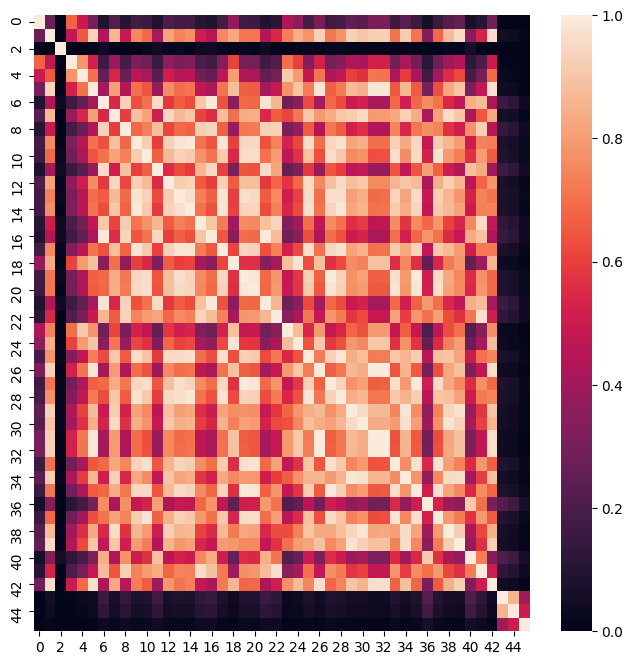

In [25]:
rcParams['figure.figsize'] = 8,8

sns.heatmap(heatDF_mInfo3)
plt.show()

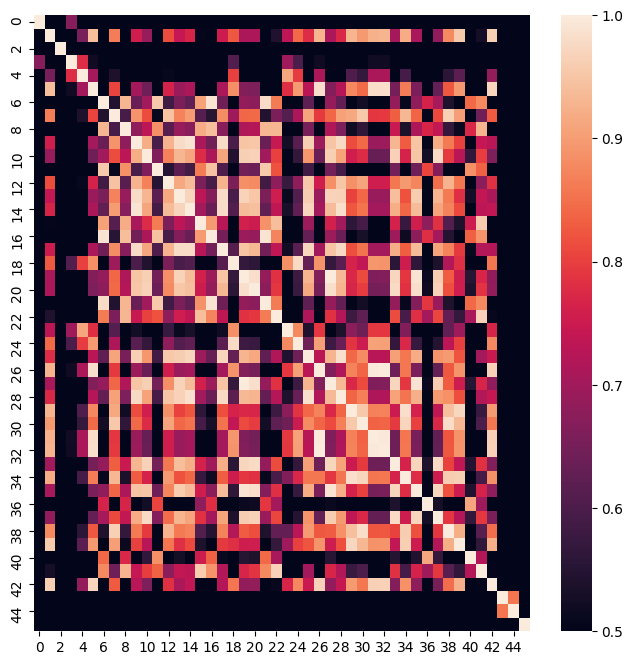

In [26]:
rcParams['figure.figsize'] = 8,8

sns.heatmap(heatDF_mInfo3, vmin=0.5)
plt.show()

In [34]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/T2T_nonRepeatBlock.csv")